# **Team Assignment 2: Marketing Analytics**
*BUMK744 Marketing Research and Analytics*

Team: 9

* Hwang, Ta-Jen
* Marmol, Jake
* Mongia, Sasha
* Yan, Lei

By submitting this assignment, we acknowledge the following pledge:

"I pledge on my honor that I have not given or received any unauthorized assistance on this exam/assignment."

---


# **Introduction**

* **Dataset/Variables Description**
* **Data Cleaning**
* **Purpose of Analysis** 

Within our introduction, we aim to provide an overview of our dataset as well as the cleaning process we undertook to make the data optimal for PCA and MDS analysis. We close out this section with the purpose/objective of our analysis.

> ## **Part (a): Dataset/Variables Description**

**Introduction: Airline Passenger Satisfaction Data**

The dataset derives from a survey on airline passenger satisfaction. Within the dataset, there are **25 total variables** that capture customer-level information as well as **Overall Passenger Satisfaction Level**. 

The goal of this analysis is to reduce the dimensionality of the data to a smaller number of principal components that are a linear combinations of a specific subset of these variables.

This will be followed by multidimensional scaling (MDS) and an MDS biplot created for visualization. We have also combined our results from PCA and MDS, by using the rotated loadings obtained through the Principal Component Analysis to create a more interprettable MDS plot.





**Variables in the Dataset:**

**Continuous variables:** Age, Flight Distance, Arrival Delay in Minutes, Departure Delay in Minutes

**Categorical variables:** Customer Type, Type of Travel, Gender

**Interval variables (Likert Scale questions rating satisfaction from 1-5):**
* Inflight Wifi Service
* Ease of Online.booking           
* Gate location
* Departure/Arrival time convenience                    
* Food and drink                   
* Online boarding                  
* Seat comfort
* Inflight entertainment  	     
* Onboard Service         
* Leg room service 
* Baggage handling                 
* Checkin service                  
* Inflight service                 
* Cleanliness        

**Chosen Variables for this analysis:**

We have decided to focus our analysis on the **14 likert scale variables** (above) for PCA and MDS. With PCA's goal of reducing redundancy (dimensionality) in the data, we believed that the questions measured on the likert scale would be able to be significantly reduced through PCA. This is because they all measure the same underlying factor, satisfaction level.




**Data Description**

Import Packages + Load Data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



# load dataset
url = 'https://raw.githubusercontent.com/jdmar13/Datasets/main/airline_passenger_satis.csv'

data = pd.read_csv(url)

In [ ]:
data.shape

(25976, 25)

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
data.describe().round(2).loc[['mean', 'std', '25%', '50%', '75%', 'min', 'max']]

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
mean,12987.50,65005.66,39.62,1193.79,2.72,3.05,2.76,2.98,3.22,3.26,3.45,3.36,3.39,3.35,3.63,3.31,3.65,3.29,14.31,14.74
std,7498.77,37611.53,15.14,998.68,1.34,1.53,1.41,1.28,1.33,1.36,1.32,1.34,1.28,1.32,1.18,1.27,1.18,1.32,37.42,37.52
25%,6493.75,32170.50,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,12987.50,65319.50,40.00,849.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,19481.25,97584.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
min,0.00,17.00,7.00,31.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
max,25975.00,129877.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1128.00,1115.00


**Summary Statistics**

Looking at the summary statistics, standardization would be necessary if a researcher were to analyze the entire dataset with such a wide variety in standard deviation. Also, looking at the minimum values for the likert scale variables, 0 is not apart of the likert scale. We will address this issue in our data wrangling. Lastly, looking at the mean, customer satisfaction across all likert scale variables is roughly around 3, which is neutral on the likert scale. This is to be expected with so many observations being aggregated together.

> ## **Part (b): Data Cleaning**

**Data Wrangling:**

As mentioned before, we decided to only focus on the likert scale variables because we believe that they all measure the same underlying factor, satisfaction level, and can be significantly reduced by PCA. There are 14 variables in total that were measured using the likert scale and will be utilized in our PCA and MDS analysis.


In [ ]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [ ]:
# drop all variables except likert scale (interval) variables
data_drop = data.drop(['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Class', 'Customer Type', 'satisfaction', 'Type of Travel', 'Gender','Unnamed: 0', 'id' ], axis=1)

In [ ]:
data_drop.shape

(25976, 14)

In [ ]:
data_drop.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4


minimum value of 0 for some of the likert scale variables. This shows that there is missing data in the dataset and needs to be removed.

> **Removing Observations with Missing Data**

The remaining variables capture satisfaction level (Likert Scale of 1 (least satisfied) to 5 (most satisfied) based on different airline services. As shown above, however, we found that some observations have a score of 0. We assumed this to be a missing data problem and so we proceeded to remove rows that have the value 0 for any of the 14 variables in our new dataset.


In [ ]:
data_drop_0 = data_drop.loc[~(data_drop == 0).any(axis=1)]

In [ ]:
data_drop_0.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4
5,3,3,3,3,5,5,3,5,4,3,1,1,2,5
6,5,5,5,5,3,5,5,5,5,5,5,4,5,3


In [ ]:
data_drop_0.describe().round(2).loc[['min']]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Miniumum value across all likert scale variables is now 1. Missing data is officially removed from the dataset.

>**Sampling:**

We have randomly sampled 100 of the 23863 observations for this analysis. This was deemed acceptable, so we figured 100 observations would be suitable for our analysis and easier to interpret for visualization. 


In [ ]:
# randomly reducing the number of observations, currently at 25,000 observations. Setting seed first
import random
np.random.seed(123)
data_clean = data_drop_0.sample(100)

In [ ]:
data_clean.shape

(100, 14)

In [ ]:
data_clean.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
12607,1,5,1,4,5,5,5,2,2,1,2,3,2,3
15649,2,3,2,3,1,2,1,1,2,4,3,3,4,1
19208,5,3,5,4,5,5,5,5,1,3,4,2,3,5
8875,1,4,1,3,5,1,5,5,3,4,4,3,5,5
25760,3,3,3,3,3,5,4,4,4,4,4,3,4,5


Our cleaned dataset (data_clean) is now properly prepared for PCA and MDS analysis. Standardization will be included in the following section.

> ## **Part (c): Purpose of Analysis**

**What is the purpose of your analysis? How can your findings potentially help improve managerial decision making?**


Our objective with PCA and MDS is to reduce the dimensionality of the data and visualize groups of customers based on their satisfaction level with different types of airline services/features. We expect PCA to reduce the 14 variables we are feeding into it, by combining all of the variables under a small set of principal components. We aim to receive high loadings on each of the principal components that we retain; to be able to clearly explain each principal component based on the variables that are strongly correlated with it (whether positive or negative). By incorporating MDS into our analysis, we are primarily interested in combining both PCA and MDS to better define customers based on their satisfaction level in a low-dimensional space. By utilizing the principal directions and plotting them on the MDS plot, we can visually identify the dissimilarity of customers based on their satisfaction with a certain subset of airline services. Our findings in this analysis can help managerial decision-making by helping the airline better target its consumers, improve customer service, and develop new, upgraded airline services. These insights are applicable to our findings as PCA and MDS can help define which groups of consumers exists, what are their common needs, and what are they currently dissatisfied with. Overall, our analysis can help the airline can better understand their consumer market, their satisfaction level with their services, and how they can effectively improve their services to boost satisfaction.

# **Analysis**

Insights we aim to extract through PCA and MDS:

**PCA**


* Determine the number of principal components that most effectively reduce the dimensionality of the dataset
* Discover the amount of variance explained by each retained PC
* Utilize loadings matrix to describe each PC based on the variables that load the highest in each direction
* Combine loading and factor score results to explain an observation’s satisfaction level with airline services
* Create loadings plot to visualize the correlation between variables and principal components
* Use rotated loadings to better define each principal component




**MDS** 
* Visualize all observations in a low-dimensional space to examine how dissimilar the observations are to each other.
* Obtain relationships between variables and the underlying structure of the data.
* Find the degree of similarity or dissimilarity between data points. 
* Identify if there are outliers between different subsets of the data.
* Discover if there are any potential clusters or groupings.

## **PCA Analysis For Dimensionality Reduction**

> Import PCA Package

In [ ]:
from sklearn.decomposition import PCA

> Standardize Data

In [ ]:
# Create a standardized dataframe for X
data_stan = (data_clean - data_clean.mean()) / data_clean.std()
data_stan.describe().round(2).loc[['mean', 'std']]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
mean,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


We decided to standardize our data in order to make insights about **correlations** instead of covariances.

In [ ]:
data_stan.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
12607,-1.326650,1.254176,-1.398518,0.856893,1.273999,1.199547,1.087436,-1.117977,-1.115727,-1.744521,-1.585462,-0.183395,-1.364692,-0.369618
15649,-0.572872,-0.179168,-0.621564,0.070753,-1.777496,-1.167980,-1.871573,-1.883714,-1.115727,0.540878,-0.674277,-0.183395,0.330578,-1.909691
19208,1.688464,-0.179168,1.709300,0.856893,1.273999,1.199547,1.087436,1.179236,-1.901450,-0.220922,0.236908,-0.980764,-0.517057,1.170456
8875,-1.326650,0.537504,-1.398518,0.070753,1.273999,-1.957156,1.087436,1.179236,-0.330004,0.540878,0.236908,-0.183395,1.178212,1.170456
25760,0.180907,-0.179168,0.155391,0.070753,-0.251748,1.199547,0.347684,0.413498,0.455719,0.540878,0.236908,-0.183395,0.330578,1.170456


In [ ]:
pca_airline = PCA(random_state=123)

pca_airline.fit (X=data_stan)

PCA(random_state=123)

> ### **PCA Directions & Scores**

> **PCA Directions**

In [ ]:
# directions
pca_directions = pd.DataFrame(
    pca_airline.components_.T,
    index=data_stan.columns,
    columns=['PC' + str(l + 1) for l in range(pca_airline.n_components_)],
)

In [ ]:
pca_directions.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Inflight wifi service,-0.09,0.51,-0.02,-0.21,-0.26,0.28,0.14,0.24,0.20,-0.08,-0.02,0.29,-0.57,-0.11
Departure/Arrival time convenient,0.10,0.41,0.19,0.24,0.37,0.12,-0.21,-0.63,0.07,-0.20,0.07,0.23,-0.04,0.17
Ease of Online booking,0.07,0.55,0.06,-0.12,-0.10,0.05,0.13,0.07,-0.28,-0.35,-0.03,-0.56,0.33,-0.11
Gate location,0.15,0.44,0.12,0.05,0.31,-0.40,-0.14,0.39,0.19,0.51,0.11,0.07,0.18,-0.06
Food and drink,-0.32,-0.03,0.37,-0.05,0.28,-0.01,-0.00,-0.03,-0.65,0.21,-0.07,0.00,-0.31,-0.33
Online boarding,-0.21,0.18,0.21,0.18,-0.69,-0.13,-0.04,-0.30,-0.08,0.37,-0.23,0.13,0.22,0.08
Seat comfort,-0.34,-0.09,0.36,0.09,-0.02,-0.07,-0.22,-0.06,0.51,-0.01,0.06,-0.58,-0.28,-0.03
Inflight entertainment,-0.47,0.07,0.04,-0.17,0.16,0.13,0.10,0.19,-0.11,0.05,0.04,0.01,0.10,0.79
On-board service,-0.24,0.07,-0.34,0.30,0.11,0.66,-0.05,0.01,0.06,0.37,0.13,-0.12,0.22,-0.25
Leg room service,-0.23,0.08,-0.38,-0.17,-0.13,-0.16,-0.80,0.04,-0.19,-0.17,0.13,0.05,-0.02,-0.04


> **PCA Directions**

This matrix showcases how each principal component is composed based on the 14 variables in the dataset. This is much more interprettable when converted into loadings, which we will discuss later on in the notebook.

In [ ]:
# scores
pca_scores = pd.DataFrame(
    pca_airline.transform(data_stan),
    columns=['PC' + str(l + 1) for l in range(pca_airline.n_components_)],
)

In [ ]:
pca_scores.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,1.51,-1.02,3.30,1.36,0.27,-0.54,-0.52,-1.04,0.01,1.47,-0.34,0.21,-0.50,0.03
1,3.40,-0.72,-2.10,-0.17,-0.02,-0.89,-0.47,-0.12,-0.01,-0.31,-0.39,0.42,-0.38,0.11
2,-1.24,1.92,2.69,-1.94,-0.87,-0.79,0.36,0.66,-0.19,-0.31,-0.25,-0.22,-0.21,0.15
3,-1.71,-1.51,0.32,-0.33,2.88,-0.67,-0.75,-0.03,0.29,-0.52,-0.24,0.14,-0.27,0.25
4,-1.32,0.38,0.13,-0.09,-0.79,0.03,-0.36,-0.00,0.48,0.08,-0.31,0.31,0.91,-0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-2.96,-0.76,-0.97,-0.20,-0.54,-0.11,-0.57,-0.55,0.07,0.84,-0.28,-0.52,0.40,0.05
96,-1.03,1.94,-0.48,0.87,-0.12,-0.44,-0.78,0.43,-0.56,-0.08,0.35,-0.32,-0.57,0.01
97,-2.32,1.79,1.47,0.86,-0.09,1.41,0.96,-0.71,-0.34,-0.51,-0.35,-0.64,0.27,-0.13
98,-1.91,-0.30,1.81,-0.94,-1.60,2.31,-0.93,0.93,-0.17,0.88,0.88,0.54,-0.53,-0.15


> **PCA Scores**

This dataframe contains PCA scores of each observation with respect to the new Principal Components. It displays how each observation scores across all the PC's. For example, observation 1 has a PC1 score of 1.51, indicating that customer 1 has a positively correlated score with principal component 1. We will standardize this later and utilize loadings to make this interpretation more understandable

> ### **Explained Variance**

In [ ]:
# eigenvalues
pca_eigenvalues = pca_airline.explained_variance_
pca_eigenvalues

array([3.55085512, 2.49598126, 2.34750182, 1.1556126 , 1.04640523,
       0.70813494, 0.57339328, 0.44049342, 0.40916041, 0.3482973 ,
       0.32190765, 0.26379908, 0.20494761, 0.13351028])

In [ ]:
pca_scores.var() # same as eignevalues above

PC1     3.550855
PC2     2.495981
PC3     2.347502
PC4     1.155613
PC5     1.046405
PC6     0.708135
PC7     0.573393
PC8     0.440493
PC9     0.409160
PC10    0.348297
PC11    0.321908
PC12    0.263799
PC13    0.204948
PC14    0.133510
dtype: float64

> **eigenvalues**

Above are shown two ways to look at the explaied variance for each principal component. According to these eigenvalues, principal component 1 explains most of the variance in the data, followed by each sequential principal component. These values are extremely valuable when standardizing PCA scores and transforming directions into loadings. They are also important when reducing dimensionality in the dataset, which we will discuss later on in the notebook

In [ ]:
# ratio of total variance explained by each PC
pca_airline.explained_variance_ratio_

array([0.25363251, 0.17828438, 0.1676787 , 0.08254376, 0.07474323,
       0.05058107, 0.04095666, 0.03146382, 0.02922574, 0.02487838,
       0.0229934 , 0.01884279, 0.01463911, 0.00953645])

* this is a more interprettable use of eigenvalues which is the explained variance per principal component by ratio across all principal components. The results show that PC1 explains 25.36% of the total variance in the dataset, followed by PC2, which explains 17.8% of the dataset, then PC3, which explains 16.7% of the dataset. After PC3, there is a large drop off in variance explained by PC4-PC14. This is useful information when deciding on dimensionality reduction.

> ### **Loadings**

In [ ]:
pca_loadings_full = pca_directions * np.sqrt(pca_eigenvalues)
pca_loadings_full.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Inflight wifi service,-0.17,0.80,-0.03,-0.23,-0.27,0.23,0.10,0.16,0.13,-0.04,-0.01,0.15,-0.26,-0.04
Departure/Arrival time convenient,0.19,0.65,0.30,0.25,0.38,0.11,-0.16,-0.42,0.05,-0.12,0.04,0.12,-0.02,0.06
Ease of Online booking,0.14,0.86,0.10,-0.13,-0.10,0.04,0.10,0.05,-0.18,-0.21,-0.02,-0.29,0.15,-0.04
Gate location,0.29,0.69,0.18,0.05,0.31,-0.34,-0.11,0.26,0.12,0.30,0.06,0.04,0.08,-0.02
Food and drink,-0.61,-0.04,0.56,-0.06,0.29,-0.01,-0.00,-0.02,-0.42,0.13,-0.04,0.00,-0.14,-0.12
Online boarding,-0.39,0.28,0.32,0.19,-0.71,-0.11,-0.03,-0.20,-0.05,0.22,-0.13,0.07,0.10,0.03
Seat comfort,-0.64,-0.14,0.56,0.09,-0.02,-0.06,-0.17,-0.04,0.33,-0.00,0.03,-0.30,-0.13,-0.01
Inflight entertainment,-0.89,0.12,0.06,-0.18,0.17,0.11,0.07,0.13,-0.07,0.03,0.02,0.00,0.04,0.29
On-board service,-0.46,0.11,-0.52,0.32,0.11,0.56,-0.04,0.01,0.04,0.22,0.08,-0.06,0.10,-0.09
Leg room service,-0.42,0.13,-0.58,-0.19,-0.13,-0.14,-0.61,0.03,-0.12,-0.10,0.07,0.03,-0.01,-0.01


After conducting online research, we discovered that loadings greater than 0.6, or less than -0.6, are considered strong loadings. The source of this information was https://www.researchgate.net

Loading >0.6 = strong positive correlation. PC correlates positively with the satisfaction of one of the variables

Loading ~ 0 = No insight about correlation between PC and variable. PC can't really explain anything about that variable

Loading <-0.6 = strong negative correlation. PC correlates negatively with the satisfaction of one of the variables (dissatisfaction)

> **Loadings**

Looking at the loadings matrix, we can quickly define each principal component based on its **correlation** to the individual variables in the dataset. As shown in the above text, we define a strong loading as one with a correlation greater than 0.6 or less than -0.6. As an example, Food and Drink, Seat Comfort, Inflight Entertainment, Baggage Handling, and Cleanliness all load strongly negative with PC1. This indicates that customers with a high positive PC1 score are likely dissatisfied with the Food and Drink, Seat Comfort, Inflight Entertainment, Baggage Handling, and Cleanliness. 

> ### **Standardized PCA Scores**

In [ ]:
pca_scores_standardized_full = pca_scores / np.sqrt(pca_eigenvalues)

pca_scores_standardized_full.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.80,-0.65,2.15,1.27,0.27,-0.64,-0.69,-1.56,0.02,2.50,-0.60,0.41,-1.10,0.09
1,1.80,-0.46,-1.37,-0.16,-0.02,-1.06,-0.62,-0.18,-0.02,-0.53,-0.68,0.81,-0.85,0.30
2,-0.66,1.22,1.75,-1.81,-0.85,-0.94,0.48,1.00,-0.30,-0.52,-0.45,-0.43,-0.46,0.41
3,-0.91,-0.95,0.21,-0.31,2.82,-0.79,-1.00,-0.04,0.45,-0.88,-0.42,0.27,-0.60,0.68
4,-0.70,0.24,0.09,-0.08,-0.78,0.04,-0.48,-0.00,0.75,0.14,-0.55,0.60,2.02,-0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.57,-0.48,-0.63,-0.19,-0.52,-0.14,-0.75,-0.83,0.12,1.41,-0.50,-1.01,0.88,0.13
96,-0.55,1.23,-0.31,0.81,-0.12,-0.52,-1.03,0.65,-0.87,-0.13,0.63,-0.62,-1.25,0.02
97,-1.23,1.13,0.96,0.80,-0.09,1.68,1.27,-1.07,-0.54,-0.86,-0.63,-1.25,0.59,-0.36
98,-1.01,-0.19,1.18,-0.87,-1.56,2.75,-1.22,1.40,-0.26,1.50,1.55,1.05,-1.17,-0.40


> **Standardized PCA Scores**

These Standardized PCA scores help us better understand a specific passenger's satisfaction level within the context of each Principal Component. Based on the **loadings** matrix in the previous section, we can now understand a consumer's profile in terms of satisfaction level. For example, with customer 4, we see a large negative loading with PC1 (-0.91). Based on the loadings, we know that PC1 describes customers who are likely dissatisfied with the Food and drink, seat comfort, inflight entertainment, baggage handling, and the cleanliness. Since customer 4 has a large **negative** score for PC1, this indicates that they are likely **satisfied** with the Food and drink, seat comfort, inflight entertainment, baggage handling, and cleanliness of the airline.

> ### **Dimensionality Reduction**

> Scree Plot for dimensionality reduction (PC selection)

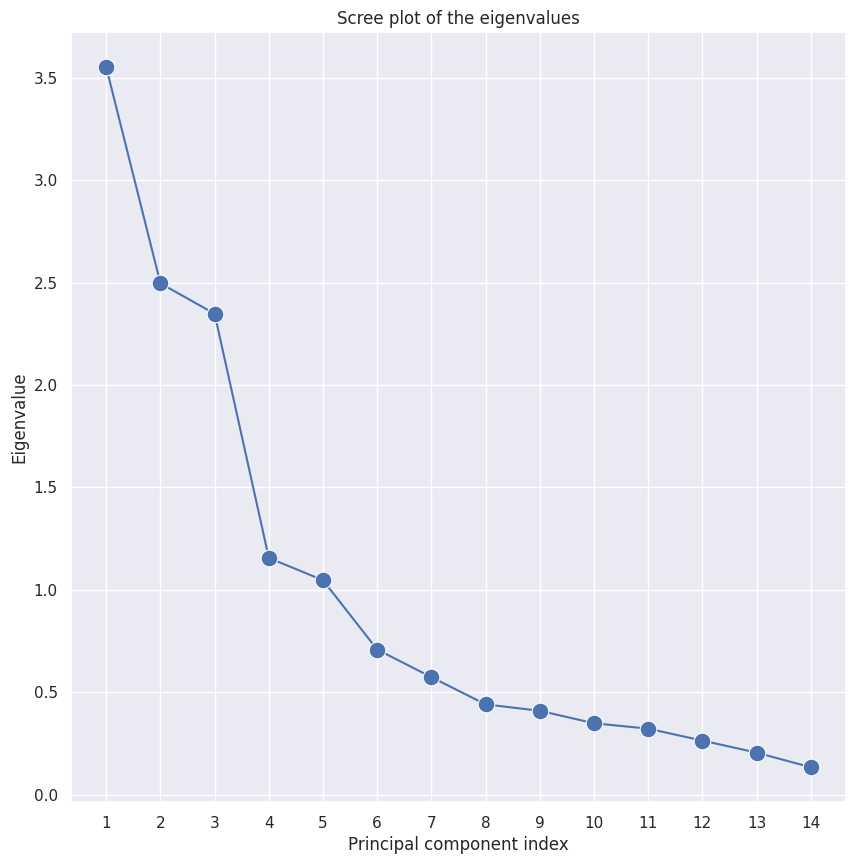

In [ ]:
# scree plot
plt.figure(figsize=(10, 10))

plt.title('Scree plot of the eigenvalues')
plt.xlabel('Principal component index')
plt.ylabel('Eigenvalue')

sns.lineplot(
    x=np.arange(len(pca_eigenvalues)) + 1,
    y=pca_eigenvalues,
    marker='o',
    markersize=12,
)
plt.xticks(np.arange(len(pca_eigenvalues)) + 1)
plt.show()

> **Scree Plot:**

We decided to use Scree plot to determine the ideal number of Principal Components to retain in our analysis. The plot has Principal Component Index on the x-axis and Eigenvalues (explained variance) on the y-axis. 

According to this plot, it would be ideal to use 3 principal components to describe our dataset. This is because the elbow "bend" is at PC4. According to marketing analysts, it is best to use the number of PC's **before** the elbow to explain the variance in the data. This is because there is a significant drop in the variance captured by Principal Component 4 and so forth.

In [ ]:
# proportion of variance explained
np.cumsum(pca_airline.explained_variance_ratio_)

array([0.25363251, 0.43191688, 0.59959559, 0.68213934, 0.75688257,
       0.80746364, 0.8484203 , 0.87988412, 0.90910986, 0.93398824,
       0.95698165, 0.97582444, 0.99046355, 1.        ])

To see how much variance is explained by the first 3 PC's, we looked at the proportion of variance explained by each principal componenet. 

~60% of total variance explained is by the first 3 PC's. This is acceptable because with 14 total variables in the dataset, it will take more PC's to explain even more of the variance. For example, if we wanted to explain just 80% of the variance in the data, we would have to use 6 PC's, which is difficult for interpretation and visualization.

> ### **Loadings & Standardized Scores w/ 3 PC's**

In [ ]:
pca_scores_standardized = pca_scores_standardized_full.iloc[:, :3]
pca_loadings = pca_loadings_full.iloc[:, :3]

Due to our output from the scree plot, we decided to reduce the dimensionality of our dataset to 3 Principal Components. The results are shown below

In [ ]:
pca_loadings.round(2)

,PC1,PC2,PC3
Inflight wifi service,-0.17,0.80,-0.03
Departure/Arrival time convenient,0.19,0.65,0.30
Ease of Online booking,0.14,0.86,0.10
Gate location,0.29,0.69,0.18
Food and drink,-0.61,-0.04,0.56
Online boarding,-0.39,0.28,0.32
Seat comfort,-0.64,-0.14,0.56
Inflight entertainment,-0.89,0.12,0.06
On-board service,-0.46,0.11,-0.52
Leg room service,-0.42,0.13,-0.58


> **Interpretting the Loadings Matrix / Defining each PC**

* PC1: The variables that are most correlated with PC1 (>0.6 or <-0.6) are Food and drink, seat comfort, inflight entertainment, baggage handling, and cleanliness. With all of the variables having negative loadings, we can define PC1 as dissatisfaction with food and drink, seat comfort, inflight entertainment, baggage handling, and cleanliness

* PC2: The variables that are most correlated with PC2 (>0.6 or <-0.6) are inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location. With all of the variables having positive loadings, we can define PC2 as satisfaction with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location

* PC3: The variables that are most correlated with PC3 (>0.5 or <-0.5) are food and drink, seat comfort, on-board service, leg room service, inflight service, and cleanliness. With some of the variables having positive and some having negative loadings, we can define PC3 as satisfaction with food and drink, seat comfort, and cleanliness, as well as dissatisfaction with on-board service, leg room service, and inflight service.
---
For PC3, we decided to look at loadings greater or less than 0.5 because there was only 1 variable that loaded greater than 0.6. In this case, we observed 0.5 as the threshold for a strong loadings, in which we were able to better interpret PC3

> IN SUM

People who load positive and high on PC1 are likely **dissatisfied** with food and drink, seat comfort, inflight entertainment, baggage handling, and cleanliness

People who load positive and high on PC2 are likely **satisfied** with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location

People who load positive and high on PC3 are likely **satisfied** with food and drink, seat comfort, and cleanliness as well as **dissatisfied** with on-board service, leg room service, and inflight service.

> **PROBLEM**

PC1 and PC3 are both correlated with the some of the same variables. PC1 has a negative correlation and PC3 has a positive correlation with those shared variables. What if a customer has a strong positive (or negative) score for PC1 AND PC3? This would cause a major contradiction and make interpretation difficult. This led us to believe that **rotating** the loadings can be more useful for our interpretation.

In [ ]:
pca_scores_standardized.round(2)

,PC1,PC2,PC3
0,0.80,-0.65,2.15
1,1.80,-0.46,-1.37
2,-0.66,1.22,1.75
3,-0.91,-0.95,0.21
4,-0.70,0.24,0.09
...,...,...,...
95,-1.57,-0.48,-0.63
96,-0.55,1.23,-0.31
97,-1.23,1.13,0.96
98,-1.01,-0.19,1.18


> **Interpretting Standardized PCA scores**

Sample Observation:

Customer 98 (97 on matrix above):

negative PC1 score (-1.23), positive PC2 score (1.13), positive PC3 score (0.96)

Customer 98 is likely satisfied with the airlines food and drink, seat comfort, inflight entertainment, baggage handling, inflight wifi service, departure/arrival time convenience, ease of online booking, gate location, and cleanliness. They are also likely dissatisfied with the airlines' on-board service, leg room service, and inflight service.

> Marketing Recommendation:

Based on customer 98's dissatisfaction level with a variety of inflight/boarding services, the airline can better serve them in the future, by focusing on making their boarding process more efficient and increasing the amount of leg room on the aircraft + improving their inflight service and offerings.


> ### **Communalities**

In [ ]:
pca_communalities = np.cumsum(pca_loadings**2, axis=1)
pca_communalities.round(2)

,PC1,PC2,PC3
Inflight wifi service,0.03,0.68,0.68
Departure/Arrival time convenient,0.04,0.46,0.54
Ease of Online booking,0.02,0.77,0.78
Gate location,0.08,0.56,0.59
Food and drink,0.37,0.37,0.69
Online boarding,0.15,0.23,0.33
Seat comfort,0.42,0.43,0.75
Inflight entertainment,0.80,0.81,0.81
On-board service,0.21,0.23,0.50
Leg room service,0.18,0.20,0.53


Communalities depict the explained cumulative variance by each PC for all the original variables in the dataset. With a 3 PC solution, we have significantly captured the variation (more than 60%) of the following variables:
* Inflight Wifi Service
* Ease of Online Booking  
* Food and Drink 
* Seat Comfort 
* Inflight Entertainment
* Baggage Handling
* Inflight Service
* Cleanliness

Based on this threshold (0.6), our 3 PC solution strongly explains 8 of the 14 total variables in the dataset. If we were to reduce this threshold to 0.5, our 3 PC solution effectively explains 12 of the 14 total variables. This reassures the fact that 3 PC's is a great solution for reducing this dataset, while only losing out on a minimal amount of variance in the dataset


> ### **Score Plot**

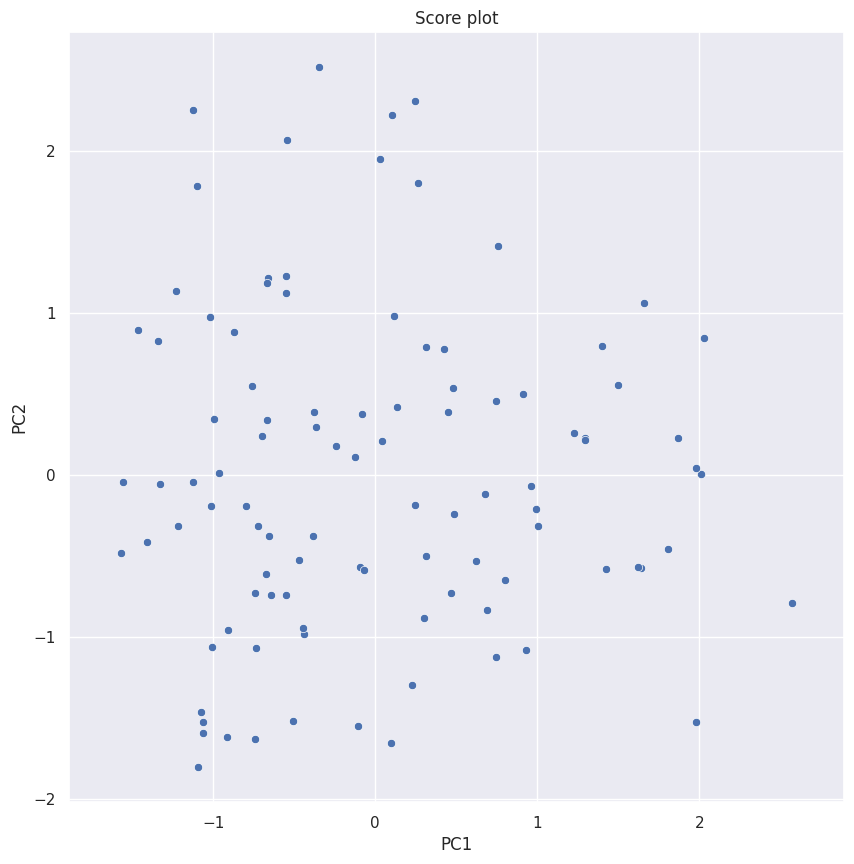

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.title('Score plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

g = sns.scatterplot(
    x=pca_scores_standardized.iloc[:, 0],
    y=pca_scores_standardized.iloc[:, 1],
)

g.axis('equal')

plt.show()

According to the score plot, we can see that there are more observations with a **negative** PC1 score. As for the PC2 direction, the number of positive and negative scores are fairly even.

More negative PC1 scores indicates that most consumers in the dataset are in fact, **satisfied** with food and drink, seat comfort, inflight entertainment, baggage handling, and the cleanliness of the airline. This result will be further analyzed through the score plot + rotated loadings Biplot.

> ### **Loadings plot**

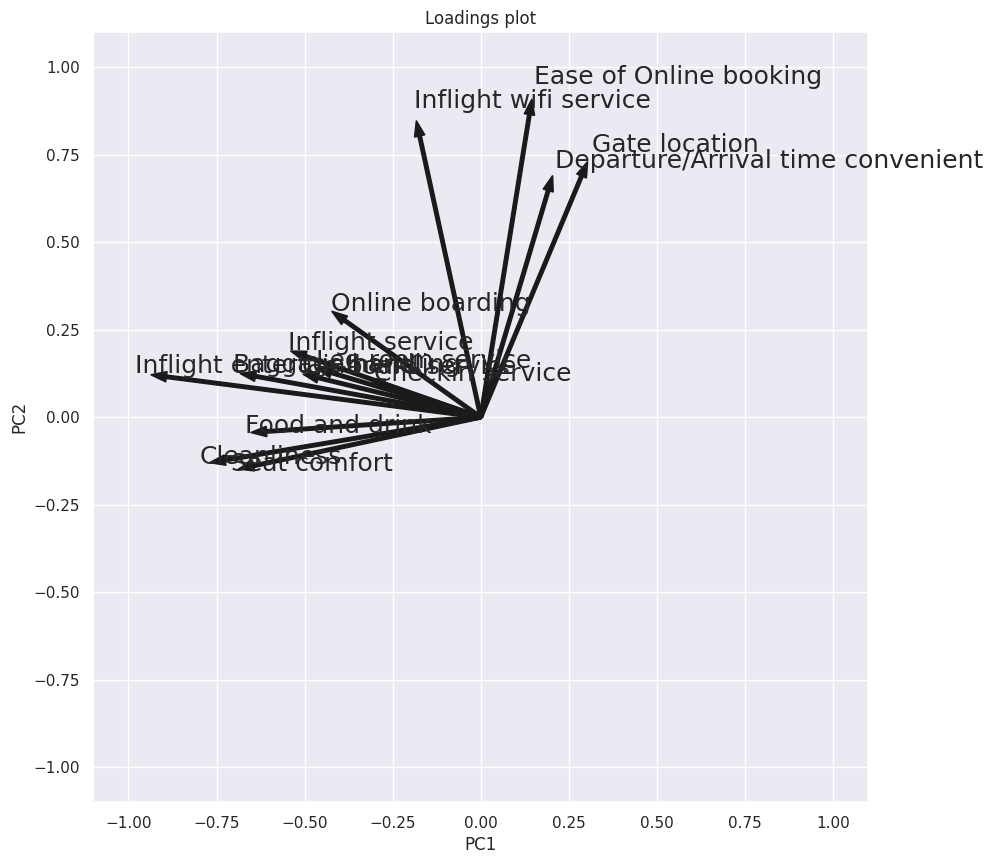

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.title('Loadings plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

xlim_val = np.max((1.1, np.max(np.abs(pca_loadings.loc[:, 'PC1']))))
plt.xlim([-xlim_val, xlim_val])

ylim_val = np.max((1.1, np.max(np.abs(pca_loadings.loc[:, 'PC2']))))
plt.ylim([-ylim_val, ylim_val])

for variable in pca_loadings.index.values:
    plt.arrow(
        x=0,
        y=0,
        dx=pca_loadings.loc[variable]['PC1'],
        dy=pca_loadings.loc[variable]['PC2'],
        width=0.01,
        color='k'
    )

    plt.text(
        x=1.1*pca_loadings.loc[variable]['PC1'],
        y=1.1*pca_loadings.loc[variable]['PC2'],
        s=variable,
        fontsize=18,
    )

plt.show()

These loadings indicate that there are orthogonal relationships between the variables. This means that variables such as Gate Location and Seat comfort are uncorrelated. Additionally, variables who are close to each other on the loadings plot are connected with each other. For example, Gate Location and departure/arrival time convenience have similar loadings. This indicates that customers who score high on PC2 are likely satisfied with both the gate location and departure/arrival time convenience. This graph showcases all 14 variance, which is chaotic. Below we make a simpler graph based on variables with communalities >.6 (more than 60% of their variance is explained by all 3 PC's).

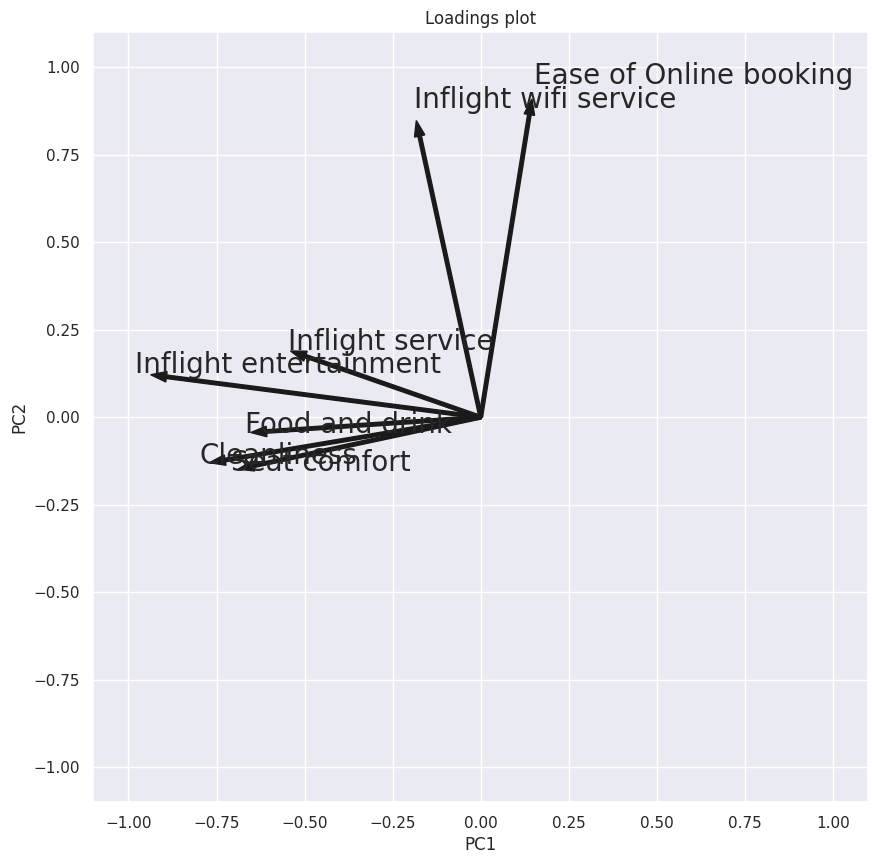

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.title('Loadings plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

xlim_val = np.max((1.1, np.max(np.abs(pca_loadings.loc[:, 'PC1']))))
plt.xlim([-xlim_val, xlim_val])

ylim_val = np.max((1.1, np.max(np.abs(pca_loadings.loc[:, 'PC2']))))
plt.ylim([-ylim_val, ylim_val])

# List of variables to include in the plot
included_variables = ['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'Inflight service', 'Cleanliness']

for variable in pca_loadings.index.values:
    # Check if the variable is in the included_variables list
    if variable in included_variables:
        plt.arrow(
            x=0,
            y=0,
            dx=pca_loadings.loc[variable]['PC1'],
            dy=pca_loadings.loc[variable]['PC2'],
            width=0.01,
            color='k'
        )

        plt.text(
            x=1.1*pca_loadings.loc[variable]['PC1'],
            y=1.1*pca_loadings.loc[variable]['PC2'],
            s=variable,
            fontsize=20,
        )

plt.show()

For the sake of making this visualization more insightful, only variables with communialities >0.6 are shown.

* based on the loadings plot above, inflight entertainment is the highest correlated variable with PC1. Alongside it are also other variables such as inflight service, food and drink, cleanliness, and seat comfort. Seeing the relationship between these variables is crucial, as their interconnectivity with each other is displayed. In a matrix, seeing similarities in the data is more difficult, making the loadings plot an essential element of PCA. A more thorough interpretation of the loadings plot will be under the rotated loadings plot in the next section of this notebook.

> ### **PCA with Rotated Loadings**





> **Why Rotate?**

We wanted to rotate the loadings in order to simplify the interpretation of the principal components. 

This is because many different variables loaded strongly with PC1. Additionally, PC1 and PC3 were explained by the same variables in the data. If we were to rotate the loadings, will we arrive at a simpler explanation for PC1 and PC3, while maintaining the integrity of our data?

Within this section of the notebook, we have included the entire rotated PCA solution using the varimax (orthogonal) rotation. What is included is:

1. Varimax Rotation
2. Rotated Loadings
3. Rotated PCA Scores
4. Rotated Communalities
5. Rotated Loadings Plot

> **Apply Varimax (Orthogonal) Rotation**

In [ ]:
loadings_as_vector = np.ravel(pca_loadings)
np.var(loadings_as_vector)

0.19908634485565457

In [ ]:
def compute_varimax_rotation_matrix(loadings, tol=1e-7, max_iter=1000):
    # Returns the rotation matrix for varimax based on the loadings matrix
    N, L = loadings.shape
    rotation_matrix = np.eye(L)
    var = 0

    for _ in range(max_iter):
        loadings_rot = loadings @ rotation_matrix
        tmp = loadings_rot * np.transpose((loadings_rot**2).sum(axis=0) / N)
        u, s, v = np.linalg.svd(loadings.T @ (loadings_rot**3 - tmp))
        rotation_matrix = u @ v
        var_new = np.sum(s)
        if var != 0 and var_new < var * (1 + tol):
            break
        var = var_new

    return rotation_matrix

In [ ]:
rotation_matrix = compute_varimax_rotation_matrix(pca_loadings)
rotation_matrix

array([[ 0.77373155,  0.0910024 ,  0.62694341],
       [ 0.04712493,  0.97861954, -0.2002075 ],
       [-0.63175844,  0.18445152,  0.75290033]])

> **Rotated Loadings**

In [ ]:
rotated_loadings = pca_loadings @ rotation_matrix
rotated_loadings.columns = ['PC1', 'PC2', 'PC3']
rotated_loadings.round(2)

,PC1,PC2,PC3
Inflight wifi service,-0.07,0.76,-0.30
Departure/Arrival time convenient,-0.01,0.71,0.21
Ease of Online booking,0.09,0.88,-0.01
Gate location,0.14,0.73,0.18
Food and drink,-0.83,0.01,0.05
Online boarding,-0.49,0.30,-0.06
Seat comfort,-0.86,-0.09,0.04
Inflight entertainment,-0.72,0.04,-0.54
On-board service,-0.02,-0.03,-0.70
Leg room service,0.04,-0.02,-0.73


> **Defining the PC's with Rotated Loadings**

With rotated loadings, each PC is slightly more interprettable (less variables load strongly with them), which leads to more robust insights.

* PC1: The variables that are most correlated with PC1 (>0.6 or <-0.6) are Food and drink, seat comfort, inflight entertainment, and cleanliness. With all of the variables having negative loadings, we can define PC1 as **dissatisfaction** with food and drink, seat comfort, inflight entertainment, and cleanliness

* PC2: The variables that are most correlated with PC2 (>0.6 or <-0.6) are inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location. With all of the variable having positive loadings, we can define PC2 as **satisfaction** with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location

* PC3: The variables that are most correlated with PC3 (>0.6 or <-0.6) are on-board service, leg room service, baggage handling, and inflight service. With all of the variables having negative loadings, we can define PC3 as **dissatisfaction** with on-board service, leg room service, baggage handling, and inflight service.

---

By rotating the loadings, PC3 was the most heavily impacted, with a much easier interpretation based on the roated loadings. Additionally, there is no longer an overlap between PC1 and PC3, as they were both correlated with some of the same variables before rotating the loadings. This can be extremely confusing, expecially if one customer has a positive PC1 score AND a positive PC3 score (inverse interpretation for PC1). How can you truly define their satisfaftion level on certain variables if both PC's contradict each other? With no more overlap between PC1 and PC3, our rotated loadings much more interprettable and useful for the remainder of our analysis.

> IN SUM

People who load positive and high on PC1 are likely **dissatisfied** with food and drink, seat comfort, inflight entertainment, and cleanliness

People who load positive and high on PC2 are likely **satisfied** with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location

People who load positive and high on PC3 are likely **dissatisfied** on-board service, leg room service, baggage handling, and inflight service.

> **Rotated Scores**

In [ ]:
rotated_scores = pca_scores_standardized @ rotation_matrix
rotated_scores.columns = ['PC1', 'PC2', 'PC3']
rotated_scores.round(2)

,PC1,PC2,PC3
0,-0.77,-0.16,2.25
1,2.24,-0.53,0.19
2,-1.56,1.45,0.66
3,-0.88,-0.98,-0.22
4,-0.58,0.19,-0.42
...,...,...,...
95,-0.84,-0.73,-1.36
96,-0.17,1.10,-0.82
97,-1.51,1.17,-0.28
98,-1.54,-0.06,0.29


> **Combining Rotated Loadings with Rotated Scores**

Since we rotated our PC loadings, we also rotated the PC scores as well in order to make new interpretations based on the rotated PC's.

Sample observation:

Customer 96 (95 on the matrix above)

Large negative loadings for all 3 PC's: (-0.84 for PC1, -0.73 for PC2, -1.36 for PC3)

Customer 96 is likely satisfied with food and drink, seat comfort, inflight entertainment, cleanliness, on-board service, leg room service, baggage handling, and inflight service. However, customer 96 is likely unsatisfied with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location.

> Marketing Recommendation:

Based on customer 96's dissatisfaction level with a couple online-related services, we recommend that airlines can better serve them by improving their online software and interface both inflight and pre-flight. This is to improve their wifi service as well as their online booking system in order to make booking with them simple, while also providing an enjoyable flight experience with high-speed internet. Additionally, since the airline knows which aspects of its service are favorable among its customers, they can further improve on those services to begin building loyal customers in the future.



> **Rotated Communalities**

In [ ]:
pca_rotated_communalities = np.cumsum(rotated_loadings**2, axis=1)
pca_rotated_communalities.round(2)

,PC1,PC2,PC3
Inflight wifi service,0.01,0.59,0.68
Departure/Arrival time convenient,0.00,0.50,0.54
Ease of Online booking,0.01,0.78,0.78
Gate location,0.02,0.56,0.59
Food and drink,0.69,0.69,0.69
Online boarding,0.24,0.33,0.33
Seat comfort,0.74,0.74,0.75
Inflight entertainment,0.53,0.53,0.81
On-board service,0.00,0.00,0.50
Leg room service,0.00,0.00,0.53


With an orthogonal rotation, the same amount of variance for each variable is still explained by the three PC's. Did not lose out on any data.

> **Rotated Loadings Plot**

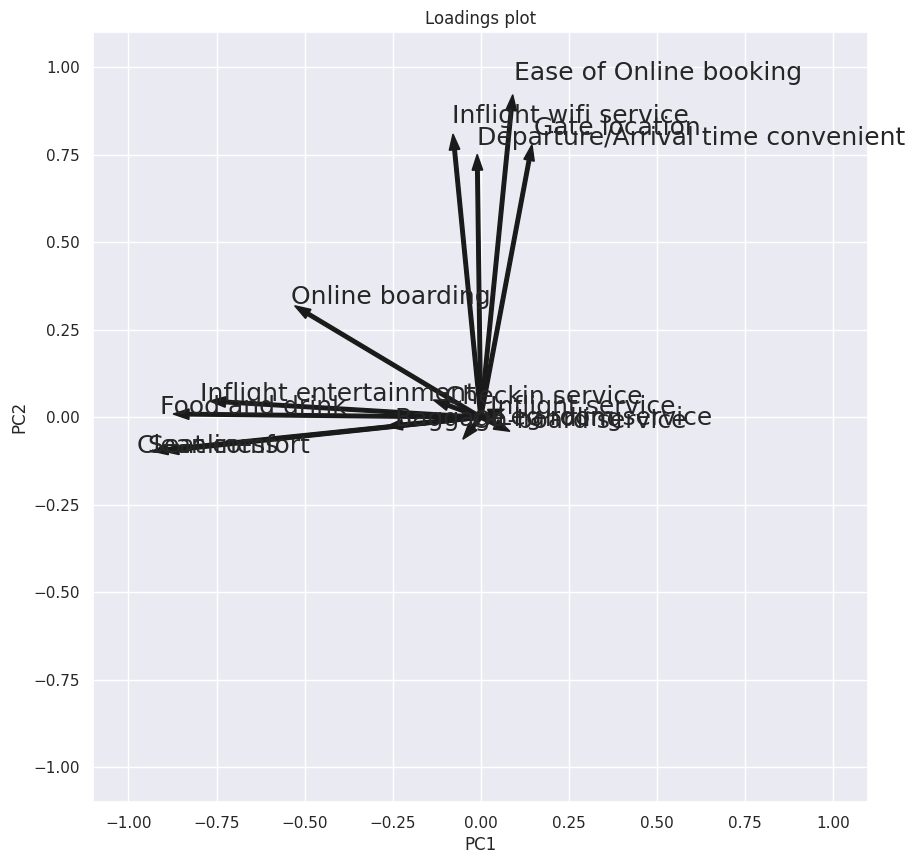

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.title('Loadings plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

xlim_val = np.max((1.1, np.max(np.abs(rotated_loadings.loc[:, 'PC1']))))
plt.xlim([-xlim_val, xlim_val])

ylim_val = np.max((1.1, np.max(np.abs(rotated_loadings.loc[:, 'PC2']))))
plt.ylim([-ylim_val, ylim_val])

for variable in rotated_loadings.index.values:
    plt.arrow(
        x=0,
        y=0,
        dx=rotated_loadings.loc[variable]['PC1'],
        dy=rotated_loadings.loc[variable]['PC2'],
        width=0.01,
        color='k'
    )

    plt.text(
        x=1.1*rotated_loadings.loc[variable]['PC1'],
        y=1.1*rotated_loadings.loc[variable]['PC2'],
        s=variable,
        fontsize=18,
    )

plt.show()

**Rotated Loadings Plot Interpretation**

* According to this plot, PC1 and PC2 are even more uncorrelated with each other than before rotating the data, with most variables being highly correlated with either PC1 or PC2, besides online boarding. 
* Variables inflight entertainment, food and drink, cleanliness, and seat comfort are all highly correlated with PC1 (aligns with loadings matrix)
* Variables inflight wifi service, departure/arrival time convenient, ease of online booking, and gate location are all highly correlated with PC2 (aligns with loadings matrix).
* A Managerial insight that pertains to this loadings plot is that changing/improving/reducing the quality of their services in one specific area (one specific PC) could have little to no impact on customer satisfaction for other services pertaining to the other principal components. Because of this, Decision makers need to be intentional with their investments. They need to know exactly which services are MOST important to their customers and improve those areas, while also potentially reducing the quality of services in another area is their customer base doesn't particularly align with a specific principal component. 

* To identify where customers are located based on the Principal component directions, we have utilized MDS to plot each observation and the PC direction arrows. We also can get insight into how dissimilar customers are between each principal component.
___
* We observed that there are variables clumped together in the middle with no correlation to either PC1 or PC2. After observing the rotated loadings matrix, these variables in the middle are likely the ones that are best explained by PC3. This indicates that the variables best explained by PC3 are hardly explained by PC1 and PC2. With the rest of the variables showcasing an orthogonal relationship to each other, we can safely determine that each PC is not heavily correlated with each other. This can be later verified in our MDS biplot. 
* The loadings plot with PC2 and PC3 is shown below.

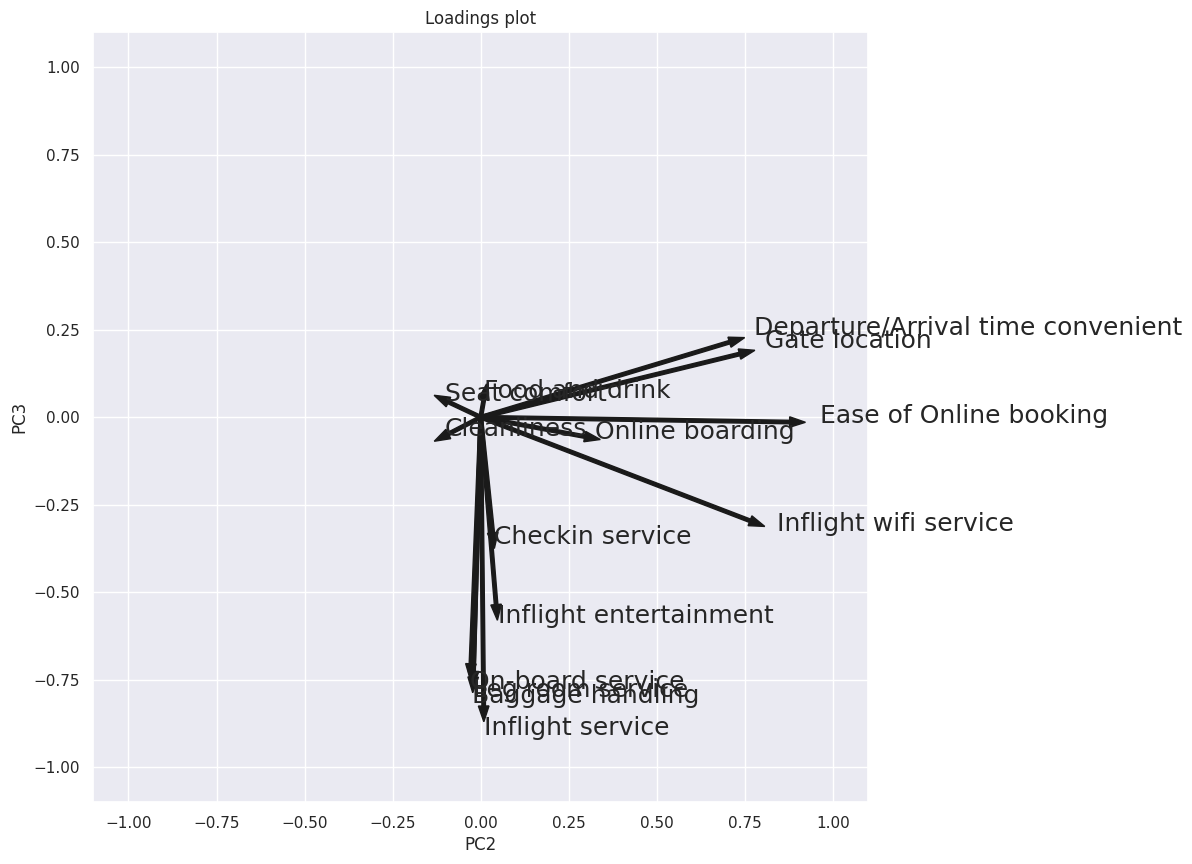

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.title('Loadings plot')
plt.xlabel('PC2')
plt.ylabel('PC3')

xlim_val = np.max((1.1, np.max(np.abs(rotated_loadings.loc[:, 'PC2']))))
plt.xlim([-xlim_val, xlim_val])

ylim_val = np.max((1.1, np.max(np.abs(rotated_loadings.loc[:, 'PC3']))))
plt.ylim([-ylim_val, ylim_val])

for variable in rotated_loadings.index.values:
    plt.arrow(
        x=0,
        y=0,
        dx=rotated_loadings.loc[variable]['PC2'],
        dy=rotated_loadings.loc[variable]['PC3'],
        width=0.01,
        color='k'
    )

    plt.text(
        x=1.1*rotated_loadings.loc[variable]['PC2'],
        y=1.1*rotated_loadings.loc[variable]['PC3'],
        s=variable,
        fontsize=18,
    )

plt.show()

As expected, the previously unexplained variables are all highly correlated with Principal Component 3. Similar to the PC1 and PC2 loadings plot, the variables are all very orthogonal, with little to no correlation between them on the PC2 and PC3 loadings plot (with inflight wifi service as the exception). This shows that the variables explained by each principal component are, for the most part, exclusively explained by each principal component. This assures us that PCA has reduced the redundancy in the data.

> ### **Score Plot + Rotated Loadings (Biplot)**

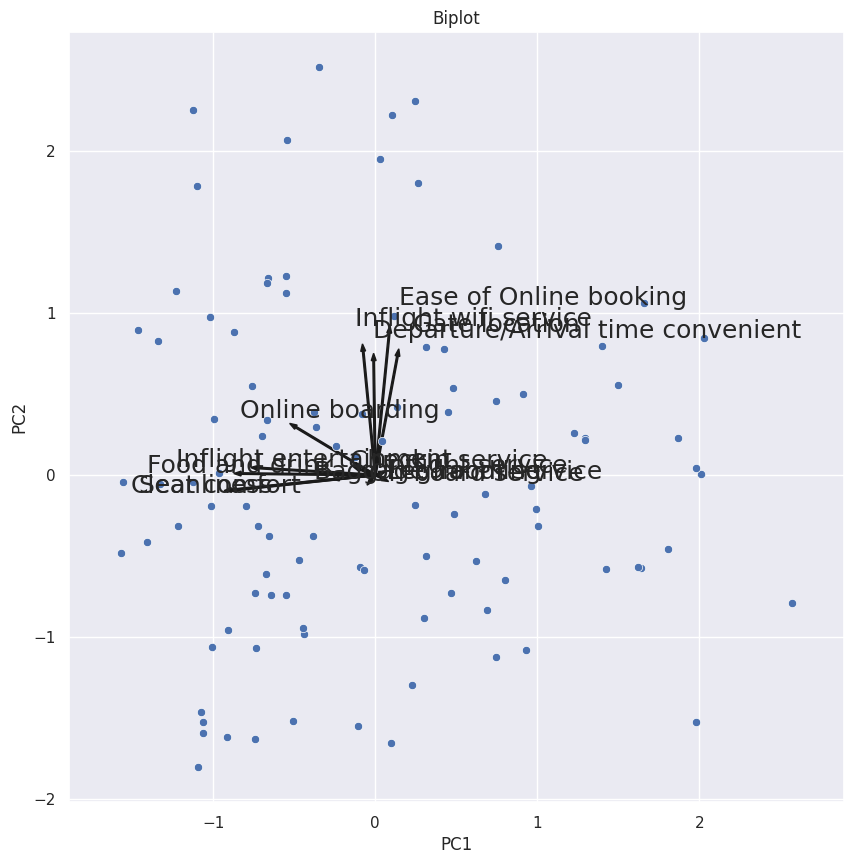

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.title('Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')

xlim_val = np.max((1.1, np.max(np.abs(rotated_loadings.loc[:, 'PC1']))))
plt.xlim([-xlim_val, xlim_val])

ylim_val = np.max((1.1, np.max(np.abs(rotated_loadings.loc[:, 'PC2']))))
plt.ylim([-ylim_val, ylim_val])

for variable in rotated_loadings.index.values:
    plt.arrow(
        x=0,
        y=0,
        dx=rotated_loadings.loc[variable]['PC1'],
        dy=rotated_loadings.loc[variable]['PC2'],
        width=0.01,
        color='k'
    )

    plt.text(
        x=1.7*rotated_loadings.loc[variable]['PC1'],
        y=1.2*rotated_loadings.loc[variable]['PC2'],
        s=variable,
        fontsize=18,
    )

g = sns.scatterplot(
    x=pca_scores_standardized.iloc[:, 0],
    y=pca_scores_standardized.iloc[:, 1],
)

g.axis('equal')
plt.show()

According to the above biplot, there is a visible disparity between observations with a negative PC1 and positive PC1 score. As mentioned in the *score plot* section of this notebook, most observations have **negative** PC1 scores, indicating that most consumers in the dataset are likely **satisfied** with food and drink, seat comfort, inflight entertainment, baggage handling, and cleanliness

Although there isn't as significant of a disparity between observations with a negative and positive PC2 score, there are a number of observations (about 50%) with a negative PC2 score. This indicates that a decent amount of consumers are likely **dissatisfied** with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location. 
___
**Managerial Insights:**
Based on the results of the biplot above, the managerial takeaway can be to invest in improving the inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location. Since wifi service and online booking are more controllable by the airline company, these two services can be a priority for improving customer satisfaction.

## **Multi-Dimensional Scaling For Visualization** 

---



---



In [ ]:
from sklearn.manifold import MDS

# set random seed
random.seed(123)

In [ ]:
mds = MDS(random_state=123, n_init=30).fit(rotated_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


### **Extracting Coordinate (C) Matrix**


In [ ]:
C = mds.embedding_
C = pd.DataFrame(
    C,
    columns=['L1', 'L2'], # named the two dimensions L1 (horizontal) and L2 (vertical)
)

In [ ]:
C.round(2)

,L1,L2
0,-2.39,0.10
1,0.13,2.38
2,-1.53,-1.65
3,1.07,-0.11
4,0.24,-0.63
...,...,...
95,1.58,-0.63
96,0.17,-1.33
97,-0.66,-1.75
98,-0.71,-0.99


Each row of C returns the MDS coordinates ( 𝐿1  and  𝐿2 )  𝐜𝑖  of an observation  𝑖 . Coordinates will be interpretted in the MDS Biplot

In [ ]:
stress = mds.stress_
stress

1287.6925115180577

###**Correlations between PC's and L1 and L2**

In [ ]:
def compute_corr_X_Z(df_X, df_Z):
    K_X = df_X.shape[1]
    corr_X_Z = pd.concat([df_X, df_Z], axis=1).corr().iloc[:K_X, K_X:]
    return pd.DataFrame(
        corr_X_Z.values,
        index=df_X.columns,
        columns=df_Z.columns,
    )

X_C_corr = compute_corr_X_Z(pca_scores_standardized, C)
X_C_corr

,L1,L2
PC1,-0.532550,0.700556
PC2,-0.336701,-0.590695
PC3,-0.742160,-0.226091


Based on the PCA analysis - PC1, PC2, and PC3 explain roughly about 60% of the total variance in the data. We will use these three components for our MDS analysis as well.
1.   The above result shows correlations between the PC's and L1 and L2.
2.   PC1 is negatively correlated with L1 (-0.53), positively correlated with L2 (0.70); PC2 is negatively correlated with L1 (-0.34), negatively correlated with L2 (-0.59); PC3 is negatively correlated with L1 (-0.74), and negatively correlated with L2 (-0.23)

Using PC definitions from the "ROTATED LOADINGS" section of the notebook to define L1 and L2 dimensions:

Observations with a large, positive L1 coordinate can be described as being **satisfied** with on-board service, leg room service, baggage handling, inflight service, food and drink, seat comfort, inflight entertainment, and cleanliness. 

Observations with a large, positive L2 coordinate can be describes as being **unsatisfied** with food and drink, seat comfort, inflight entertainment, cleanliness, inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location.

**After interpreting these results, we can further describe consumers with a high, positive L1 coordinate as more satisfied customers and customers with a high, positive L2 coordinate as less satisfied customers, overall.**


###**MDS Scatter Plot**

MDS can help us visualize our observations in a low-dimensional space (default: 2 dimensions). The benefit of visualizing our data in a low-dimensional space is that it makes it easier for us to identify the dissimilarity between observations, or even discover relationships between observations on a coordinate plane.

We'll start with a scatterplot visualization.

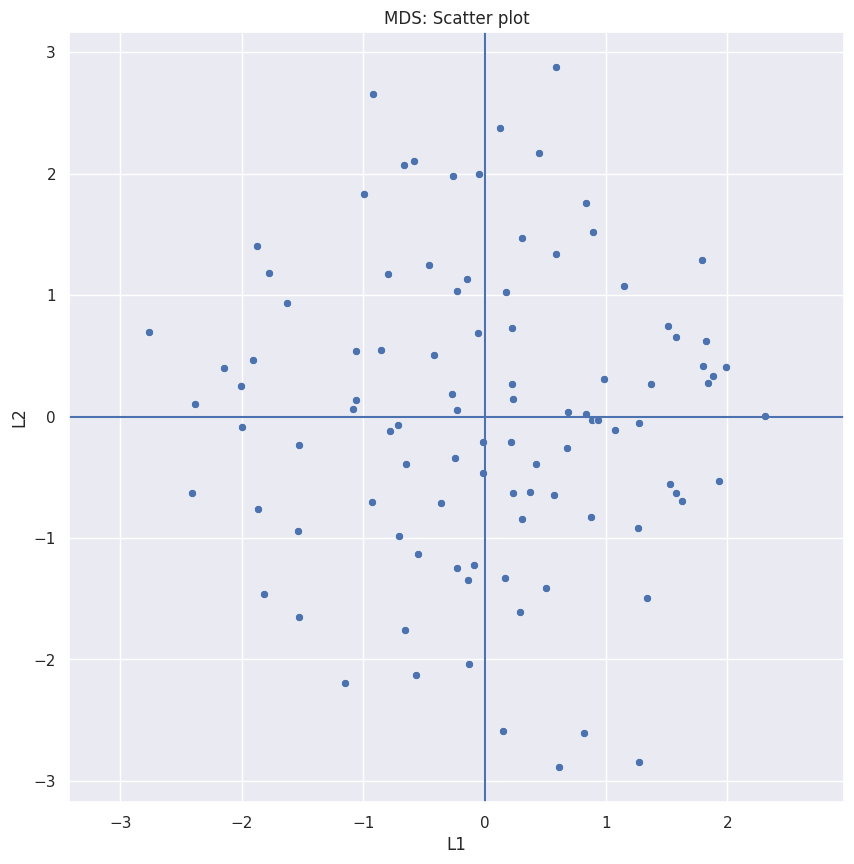

In [ ]:
plt.figure(figsize=(10, 10))

# create line for the axes
plt.axhline(0)
plt.axvline(0)

# create a scatterplot of the MDS coordinates
sns.scatterplot(
    x='L1',
    y='L2',
    data=C,
)
plt.axis('equal')

plt.title('MDS: Scatter plot')
plt.show()

According to the MDS scatterplot, the observations are evenly spread out around the center point, with **no clear groupings or clusters**. 
Therefore, we combined the PC's and this scatter plot in an MDS biplot for more meaningful interpretations.

### **MDS Biplot**

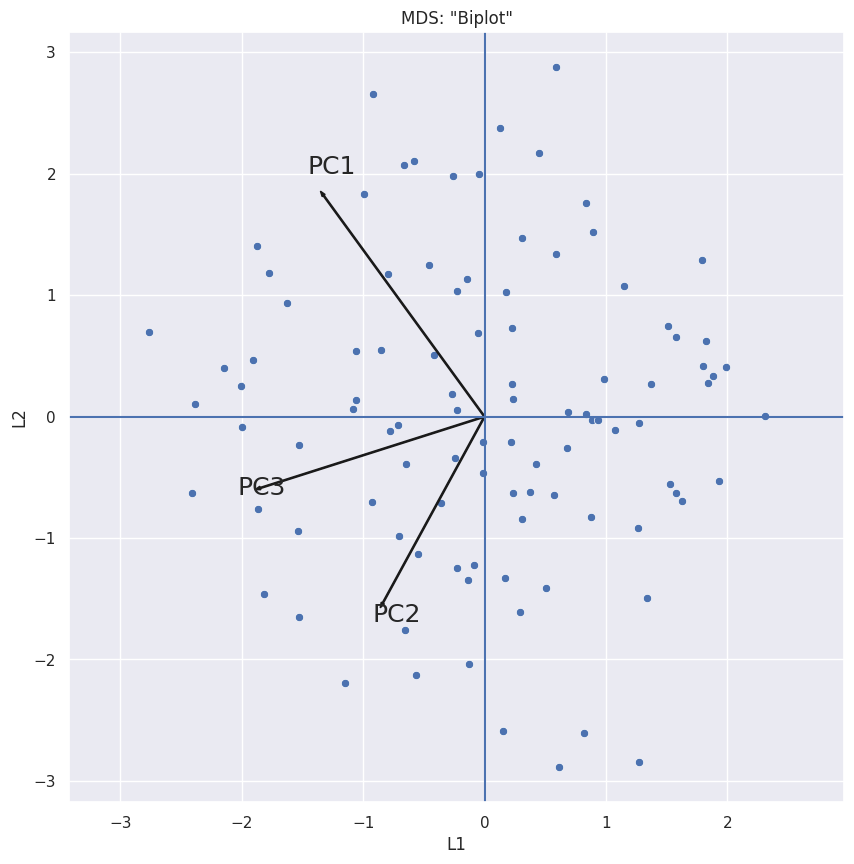

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])

# create line for the axes
plt.axhline(0)
plt.axvline(0)

# create a scatterplot of the MDS coordinates
sns.scatterplot(
    x='L1',
    y='L2',
    data=C,
)
plt.axis('equal')

abs_xlim = 0.9 * np.max(np.abs(C.iloc[:, 0]))
abs_ylim = 0.9 * np.max(np.abs(C.iloc[:, 1]))

for variable in X_C_corr.index.values:
    ax.arrow(
        x=0,
        y=0,
        dx=X_C_corr.loc[variable]['L1'] * abs_xlim,
        dy=X_C_corr.loc[variable]['L2'] * abs_ylim,
        width=0.01,
        color='k'
    )

    ax.text(
        x=1.1*X_C_corr.loc[variable]['L1'] * abs_xlim,
        y=1.1*X_C_corr.loc[variable]['L2'] * abs_ylim,
        s=variable,
        fontsize=18,
    )

plt.title('MDS: "Biplot"')
plt.show()

**Using this biplot, we can observe the relationship between the PCs.**


1.   PC1 and PC2 are nearly orthogonal (90° angle), which means that PC1 and PC2 are ucorrelated with each other. This was to be expected since PCA reduces dimensionality by removing redundancy in the data. An important conclusion that can be drawn from this is that a customer with a strong positive score for PC1 can have a strong negative, strong positive, or even a weak PC2 score. Their PC1 and PC2 scores are not correlated at all. In other words, A customer's satisfaction level with food and drink, seat comfort, inflight entertainment, and cleanliness (PC1) does not affect their satisfaction level with inflight wifi service, departure/arrive time convenience, ease of online booking, and gate location (PC2).


2.   PC3 is more correlated to PC2 than PC1. This shows that observations that load negatively for the L2 dimension are more likely to have satisfaction levels that pertain to PC2 and PC3. For example, a customer who has the coordinates (-1, -1) is likely satisfied with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location (Pc2). They are also likely unsatisfied with on-board service, leg room service, baggage handling, and inflight service (PC3).




**L1 Interpretation**

1.   Negatively correlated with PC1, PC2, and PC3. An observation with a large positive coordinate for 𝐿1 indicates that this observation will most likely have a large negative value for the three principal components (and vice versa), especially for PC3, which is much more negatively correlated with L1 than the other principal components.

2.   Combining this plot with PCA: 
An observation with a large positive coordinate for 𝐿1 indicates that the customer is likely **satisfied** with on-board service, leg room service, baggage handling, inflight service, food and drink, seat comfort, inflight entertainment, baggage handling, and cleanliness. This also indicates that they are likely unsatisfied with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location (although not as strongly correlated as PC3).




---


**L2 Interpretation**

1.  Positively correlated with PC1 and negatively correlated with PC2 and PC3. An observation with a large positive coordinate for 𝐿2 indicates that the observation is likely to have a large positive score for PC1 and a negative score for PC2 and PC3.

2.  Combining this plot with PCA: An observation with a large positive coordinate for  𝐿2 indicates that the passanger is **unsatisfied** with food and drink, seat comfort, inflight entertainment, baggage handling, cleanliness, inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location. Adversely, they are also likely satisfied with on-board service, leg room service, baggage handling, and inflight service (although not as heavily weighted with PC3 being only slightly negatively correlated with L2)






In [ ]:
C.round(2)

,L1,L2
0,-2.39,0.10
1,0.13,2.38
2,-1.53,-1.65
3,1.07,-0.11
4,0.24,-0.63
...,...,...
95,1.58,-0.63
96,0.17,-1.33
97,-0.66,-1.75
98,-0.71,-0.99


> Interpretation using an observation from the Coordinate Matrix

* Customer 3 (L1: -1.53) (L2: -1.65) -> coordinates (-1.53, -1.65)
* Customer 4 (L1: 1.07) (L2: -0.11) -> coordinates (-1.07, -0.11)


Based on its coordinates, Customer 3 is likely satisfied with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location (PC2). They are also likely unsatisfied with on-board service, leg room service, baggage handling, and inflight service (PC3). Additionally, they are also very dissimilar to customer 4 when it comes to their L1 coordinates. Customer 4 is likely satisfied with on-board service, leg room servie, baggage handling, and inflight service. They are also likely unsatisfied with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location. As expected, they share almost completely opposite opinions based on their dissimilarity on the L1 axis. If airlines were to make a decision based on this result, they should target customers with similar L1 axis coordinates.

# **Conclusion**

Among our key findings is the interpretation of the three principal components in our PCA analysis: **PC1** indicates passenger ***dissatisfaction*** with food and drink, seat comfort, inflight entertainment, and cleanliness; **PC2** indicates passenger ***satisfaction*** with inflight wifi service, departure/arrival time convenience, ease of online booking, and gate location; **PC3** indicates passengers' ***dissatisfaction*** with on-board service, leg room service, baggage handling, and inflight service. After defining each principal component, we then applied them to our MDS analysis, so that we could effectively visualize and interpret the relationship between each PC as well as the dissimilarity between observations. By drawing the correlational relationships between the three PCs and the 𝐿1 and 𝐿2 dimensions on the MDS biplot, we discovered more key findings for our analysis. For example, the larger the positive scores on the 𝐿1 dimension, the more satisfied the passenger is with the food and drink, seat comfort, inflight entertainment, and the cleanliness of the airline. Although we hoped to find groups or clusters of observations in the MDS biplot, the MDS scatterplot ended up being evenly distributed, which we found to be a major limitation in our analysis. Because of this finding, however, we decided to adjust our intrepretations, by focusing on the PC directions and their relationships with each other through observations in the MDS biplot. For example, we could identify observations that scored heavier alongside the PC1 direction, while other observations scored heavier alongside the PC2 direction, etc. With this information, we could at least identify consumer behaviors, with some finding a certain subset of services unsatisfactory, while others were more satisfied with a different subset of services. To make this a more robust interpretation, however, we believe that the airline company can use k-means or hierarchy clustering to better group customers in order to improve segmentation and marketing efficiency.

Overall, our key findings helped us draw some important takeaways that an airline manager or decision-maker can consider in the future for implementation. (1) a considerable amount of consumers are dissatisfied with at least one service on the airline. This is an important takeaway because according to the MDS biplot, as well as the score plot, consumers exist in every quadrant of the coordinate plane, indicating that there are dissatisfied consumers for virtually every dimension or service offered. Although this may seem pessimistic, an airline company should strive to see most of their passengers satisfied with their services. You would expect to see a significantly larger amount of satisfied consumers versus dissatisfied consumers, which was not the case in our visualizations. (2) Most of the variation in the data is explained by PC1, which loads strongly with food and drink, seat comfort, inflight entertainment, and cleanliness. This is an important insight, because it sheds light on the most important and significant services for the airline to improve on, in order to maximize the number of satisfied passengers. All of these services can be easily upgraded and marketing the new and improved services can likely draw a lot of attention and improve customer retention. Lastly, (3) implementing a loyalty program can be beneficial for the airline to boost satisfaction rates as well as customer loyalty. With many of the variables in our dataset pertaining to inflight airline services, a lot of the services can be quickly improved on and marketed as upgraded offerings. If many of the upgraded offerings include services that loaded strongly with our principal components, such as food and drink, seat comfort, and inflight wifi service, this may incentivize customers to enlist in the program in order to enjoy the services that they were previously dissatisfied with. Additionally, this is a win-win as the customers are now enrolled in the airline's loyalty program and are much more likely to be retained.



# **Team cooperation**

Our team cooperated well together and communicated throughout the entirety of this assignment. From picking our dataset to writing the conclusion, we have all played a part in our analysis. Everyone contributed equally to this assignment and everyone was present when we had team meetings. 

Our plan of attack after selecting a dataset was to divide our analyses - with two team members working primarily on PCA and the other two working primarily on MDS. We maintained communication throughout this process, however, to maintain synergy across the two methods to arrive at meaningful interpretations and results. If there was any confusion, we would communicate with each other to arrive at the best solution.

Overall, this team worked equitably and everyone played a significant role in the development and completion of this assignment. There were no issues among the four of us.